In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trade = pd.read_csv("trade.csv")
trade = trade.drop("기타사항", axis=1)
trade.dropna(how="all", subset=["수출건수", "수출금액", "수입건수", "수입금액", "무역수지"], inplace=True)
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[191, '무역수지'] = (trade.loc[188, '무역수지'] + trade.loc[194, '무역수지'] )/2
trade.drop_duplicates(inplace=True)

### 이상치를 찾는 z-score 방식

In [8]:
# 표준점수를 구해주는 함수 작성
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
# abs(df[col] - np.mean(df[col])) : 데이터에서 평균을 빼준 것에 절대값을 취합니다.
# abs(df[col] - np.mean(df[col]))/np.std(df[col]) : 위에서 얻은 값을 표준편차로 나눠줍니다.
# df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index: 값이 z보다 큰 데이터의 인덱스를 추출합니다.

In [9]:
trade.loc[outlier(trade,"무역수지",1.5)] # outlier함수가 인덱스를 반환하기 때문에 loc를 사용

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [10]:
trade.loc[outlier(trade,"무역수지",2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [11]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])<z].index
# z보다 작으면 이상치가 아니라는 함수

In [12]:
trade.loc[not_outlier(trade, "무역수지", 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### 사분위 범위수 IQR로 이상치를 찾는 방식

In [15]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

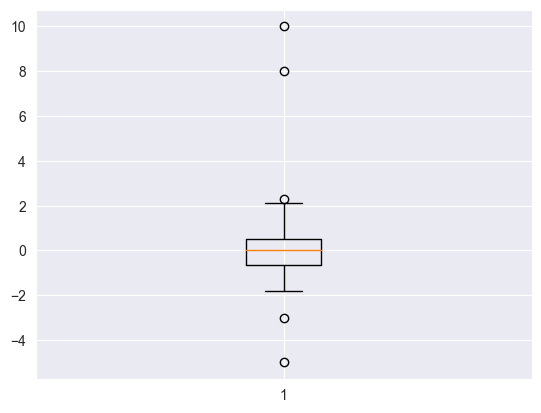

In [17]:
plt.boxplot(data)
plt.show()

----

In [30]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

percentile은 백분위수를 구해주는 함수 옵션으로 백분위수에 해당하는 값을 넣을 수 있다.
백분위수란 오름차순으로 정렬했을때, 0을 최솟값, 100을 최댓값으로 백분율로 나타낸 특정위치의 값.

In [31]:
Q3

0.5166477538712722

In [32]:
Q1

-0.6478448291078243

In [33]:
# 코드로 이상치를 판단할때 (IQR을 이용)
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

----

In [35]:
Q3, Q1 = np.percentile(trade["무역수지"], [75 ,25])
print(Q3, Q1)

2745131.0 -1620432.0


In [36]:
IQR = Q3 - Q1
IQR

4365563.0

In [37]:
# 1.5를 기준으로는 이상치가 안 보임
trade[(Q1-1.5*IQR > trade["무역수지"])|(Q3+1.5*IQR < trade["무역수지"])]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [39]:
# 0.5를 기준으로는 이상치가 보임
trade[(Q1-0.5*IQR > trade["무역수지"])|(Q3+0.5*IQR < trade["무역수지"])]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
123,2018년 06월,중국,257130.0,13814241.0,279023.0,8713018.0,5101223.0
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0
